In [1]:
!pip install wbdata pandas matplotlib

In [5]:
import wbdata
import pandas as pd
import datetime

# World Bank indicators
indicators = {
    "NY.GDP.MKTP.CD": "GDP (current US$)",
    "SL.UEM.TOTL.ZS": "Unemployment (% of labor force)",
    "SL.TLF.CACT.FE.ZS": "Female labor force participation (% of female population age 15+)"
}

# Country: Germany
country = "DE"

# Time period
data = wbdata.get_dataframe(indicators, country=country,
                            date=(datetime.datetime(2000, 1, 1), datetime.datetime(2022, 1, 1)))


# Reverse the order (years in ascending order)
data = data[::-1]

# Save to CSV
data.to_csv("germany_worldbank_data.csv")

# Preview first rows
data.head()


,GDP (current US$),Unemployment (% of labor force),Female labor force participation (% of female population age 15+)
date,,,
2000,1.966981e+12,7.917,49.001
2001,1.966381e+12,7.773,49.347
2002,2.102351e+12,8.482,49.580
2003,2.534716e+12,9.779,49.985
2004,2.852318e+12,10.727,49.742


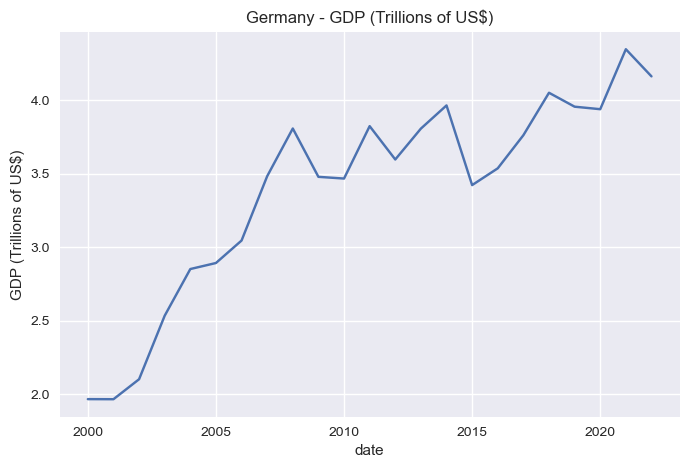

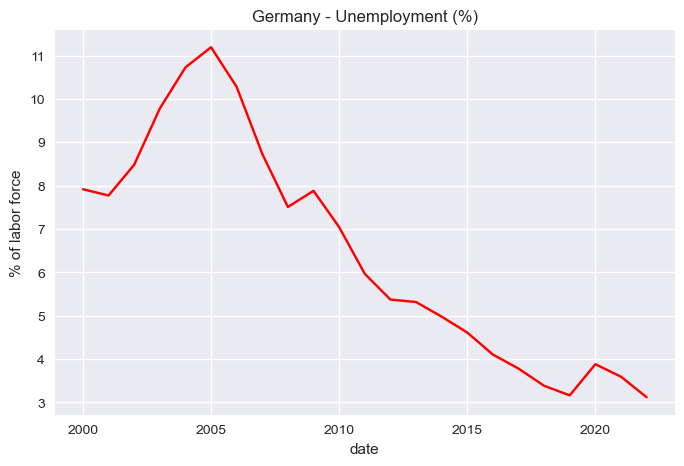

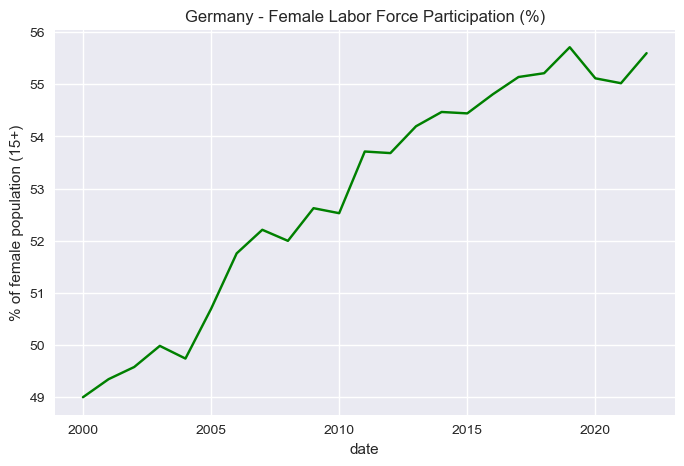

In [6]:
import matplotlib.pyplot as plt

# Use seaborn style
plt.style.use("seaborn-v0_8")

# Plot GDP with better formatting (in trillions)
fig, ax = plt.subplots(figsize=(8,5))
(data["GDP (current US$)"] / 1e12).plot(ax=ax)
ax.set_title("Germany - GDP (Trillions of US$)")
ax.set_ylabel("GDP (Trillions of US$)")
plt.show()

# Plot Unemployment
fig, ax = plt.subplots(figsize=(8,5))
data["Unemployment (% of labor force)"].plot(ax=ax, color="red")
ax.set_title("Germany - Unemployment (%)")
ax.set_ylabel("% of labor force")
plt.show()

# Plot Female labor force participation
fig, ax = plt.subplots(figsize=(8,5))
data["Female labor force participation (% of female population age 15+)"].plot(ax=ax, color="green")
ax.set_title("Germany - Female Labor Force Participation (%)")
ax.set_ylabel("% of female population (15+)")
plt.show()


In [8]:
print(data_compare.head())
print(data_compare.columns)


country        France       Germany  France  Germany  France  Germany
date                                                                 
2000     1.360959e+12  1.966981e+12  10.218    7.917  48.535   49.001
2001     1.370377e+12  1.966381e+12   8.610    7.773  48.324   49.347
2002     1.492428e+12  2.102351e+12   8.702    8.482  48.535   49.580
2003     1.835096e+12  2.534716e+12   8.306    9.779  49.761   49.985
2004     2.109792e+12  2.852318e+12   8.914   10.727  49.582   49.742
Index(['France', 'Germany', 'France', 'Germany', 'France', 'Germany'], dtype='object', name='country')


In [3]:
import wbdata
import pandas as pd
import datetime

# Define indicators
indicators = {
    "NY.GDP.MKTP.CD": "GDP (current US$)",
    "SL.UEM.TOTL.ZS": "Unemployment (% of labor force)",
    "SL.TLF.CACT.FE.ZS": "Female labor force participation (% of female population age 15+)"
}

# Define countries
countries = ["DE", "FR"]

# Fetch data from 2000 to 2022
data_compare = wbdata.get_dataframe(
    indicators,
    country=countries,
    date=(datetime.datetime(2000, 1, 1), datetime.datetime(2022, 1, 1))
)

# Reverse order so years ascend
data_compare = data_compare[::-1]


In [4]:
# Reset index and pivot so each country+indicator has its own column
data_compare = data_compare.reset_index()
data_compare = data_compare.pivot_table(
    index='date',
    columns='country'
)

# Flatten MultiIndex columns
data_compare.columns = [
    f"{indicator}_{country}" for indicator, country in data_compare.columns
]


In [5]:
['GDP_DE', 'GDP_FR', 'Unemployment_DE', 'Unemployment_FR', 'FemaleLF_DE', 'FemaleLF_FR']


['GDP_DE',
 'GDP_FR',
 'Unemployment_DE',
 'Unemployment_FR',
 'FemaleLF_DE',
 'FemaleLF_FR']

In [6]:
print(data_compare.head())
print(data_compare.columns)


      Female labor force participation (% of female population age 15+)_France  \
date                                                                             
2000                                             48.535                          
2001                                             48.324                          
2002                                             48.535                          
2003                                             49.761                          
2004                                             49.582                          

      Female labor force participation (% of female population age 15+)_Germany  \
date                                                                              
2000                                             49.001                           
2001                                             49.347                           
2002                                             49.580                           
2003      

In [11]:
# Rename columns for easier plotting
data_compare = data_compare.rename(columns={
    "GDP (current US$)_Germany": "GDP_Germany",
    "GDP (current US$)_France": "GDP_France",
    "Unemployment (% of labor force)_Germany": "Unemployment_Germany",
    "Unemployment (% of labor force)_France": "Unemployment_France",
    "Female labor force participation (% of female population age 15+)_Germany": "FemaleLF_Germany",
    "Female labor force participation (% of female population age 15+)_France": "FemaleLF_France"
})


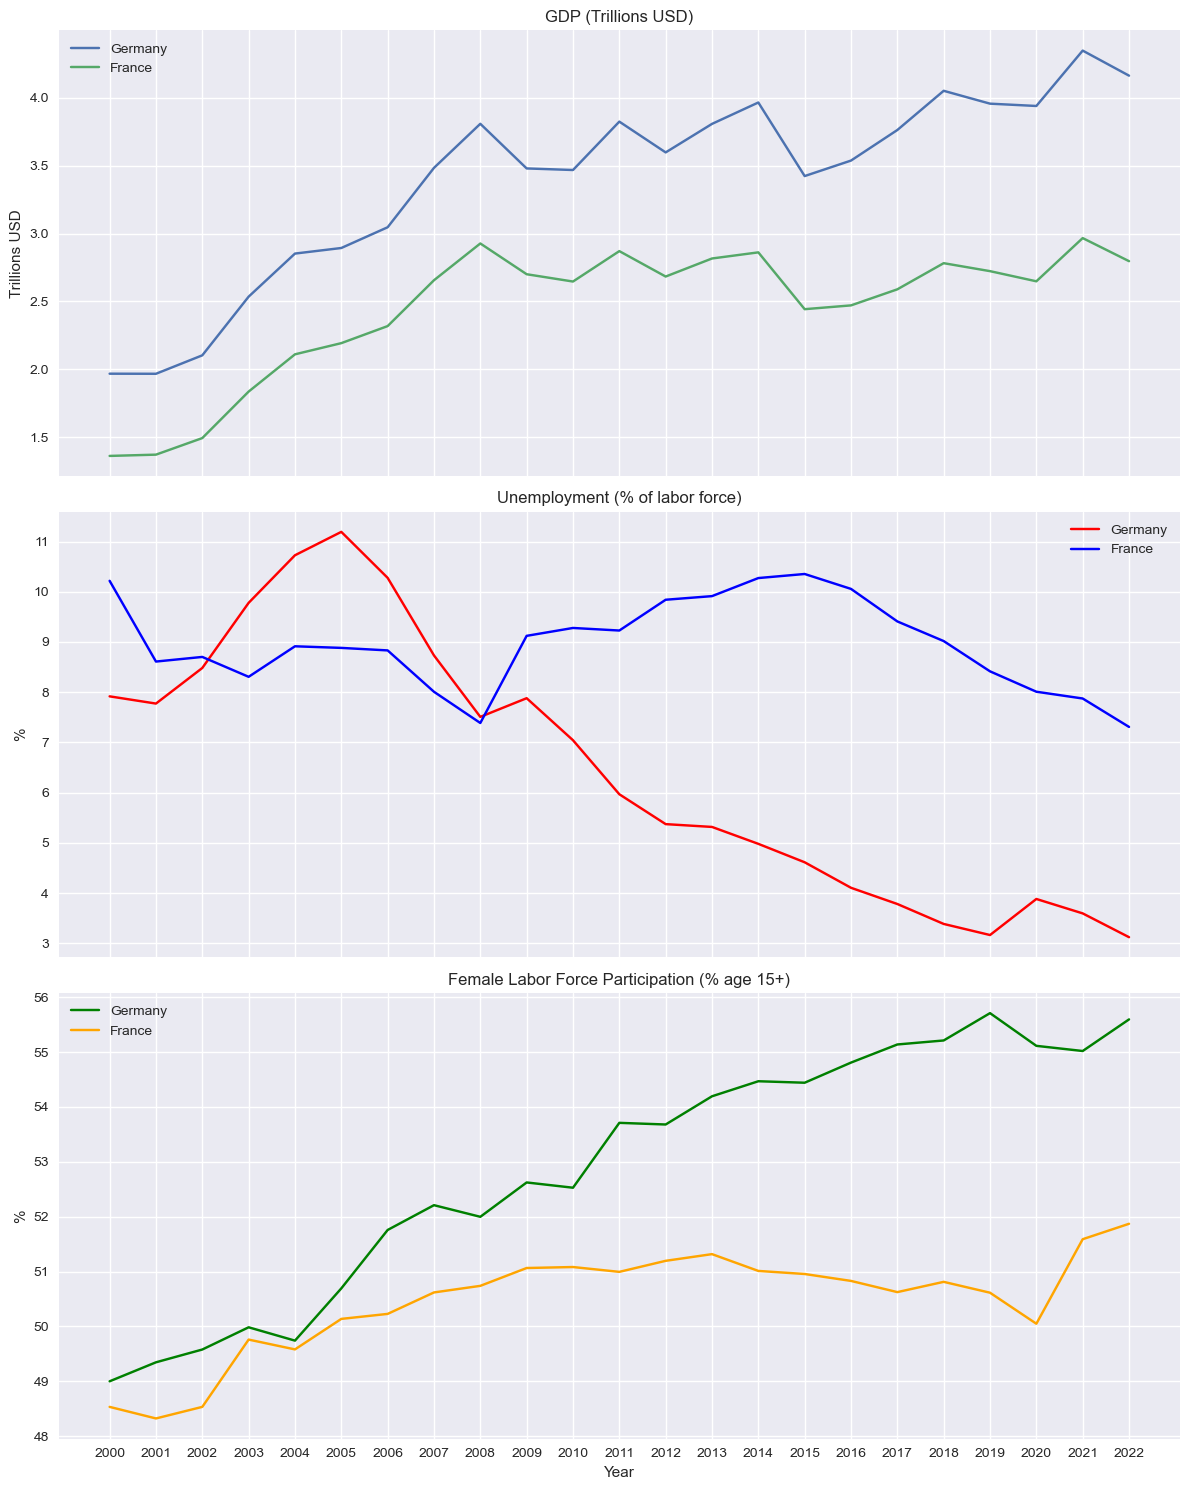

In [12]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# --- GDP ---
axes[0].plot(data_compare.index, data_compare["GDP_Germany"] / 1e12, label="Germany")
axes[0].plot(data_compare.index, data_compare["GDP_France"] / 1e12, label="France")
axes[0].set_title("GDP (Trillions USD)")
axes[0].set_ylabel("Trillions USD")
axes[0].legend()

# --- Unemployment ---
axes[1].plot(data_compare.index, data_compare["Unemployment_Germany"], label="Germany", color="red")
axes[1].plot(data_compare.index, data_compare["Unemployment_France"], label="France", color="blue")
axes[1].set_title("Unemployment (% of labor force)")
axes[1].set_ylabel("%")
axes[1].legend()

# --- Female Labor Force Participation ---
axes[2].plot(data_compare.index, data_compare["FemaleLF_Germany"], label="Germany", color="green")
axes[2].plot(data_compare.index, data_compare["FemaleLF_France"], label="France", color="orange")
axes[2].set_title("Female Labor Force Participation (% age 15+)")
axes[2].set_ylabel("%")
axes[2].legend()

axes[2].set_xlabel("Year")
plt.tight_layout()
plt.show()
